### HIPÓTESIS 2  "¿Las películas ganadoras de premios importantes (Oscar, etc.) reciben más valoración del público en IMDb?"

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Leemos el archivo usando '\t' como separador (tabulador)
premios_df = pd.read_csv('../dataF/full_data.csv', sep='\t')

premios_df


,Ceremony,Year,Class,CanonicalCategory,Category,NomId,Film,FilmId,Name,Nominees,NomineeIds,Winner,Detail,Note,Citation,MultifilmNomination
0,1,1927/28,Acting,ACTOR IN A LEADING ROLE,ACTOR,an0051251,The Noose,tt0019217,Richard Barthelmess,Richard Barthelmess,nm0001932,NaN,Nickie Elkins,NaN,NaN,True
1,1,1927/28,Acting,ACTOR IN A LEADING ROLE,ACTOR,an0051252,The Patent Leather Kid,tt0018253,Richard Barthelmess,Richard Barthelmess,nm0001932,NaN,The Patent Leather Kid,NaN,NaN,True
2,1,1927/28,Acting,ACTOR IN A LEADING ROLE,ACTOR,an0051250a,The Last Command,tt0019071,Emil Jannings,Emil Jannings,nm0417837,True,General Dolgorucki [Grand Duke Sergius Alexander],NaN,NaN,True
3,1,1927/28,Acting,ACTOR IN A LEADING ROLE,ACTOR,an0051250b,The Way of All Flesh,tt0019553,Emil Jannings,Emil Jannings,nm0417837,True,August Schilling,NaN,NaN,True
4,1,1927/28,Acting,ACTRESS IN A LEADING ROLE,ACTRESS,an0051255,A Ship Comes In,tt0018389,Louise Dresser,Louise Dresser,nm0237571,NaN,Mrs. Pleznik,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12009,97,2024,SciTech,SCIENTIFIC AND TECHNICAL AWARD (Technical Achi...,SCIENTIFIC AND TECHNICAL AWARD (Technical Achi...,NaN,NaN,NaN,NaN,"Dustin Brooks, Colin Decker",NaN,True,NaN,Fire for Hire's gel first publicly demonstrate...,To DUSTIN BROOKS and COLIN DECKER for the deve...,NaN
12010,97,2024,SciTech,SCIENTIFIC AND TECHNICAL AWARD (Technical Achi...,SCIENTIFIC AND TECHNICAL AWARD (Technical Achi...,NaN,NaN,NaN,NaN,"Attila T. Áfra, Timo Aila",NaN,True,NaN,Open Image Denoise is an open-source library t...,To ATTILA T. ÁFRA for the creation of Intel Op...,NaN
12011,97,2024,SciTech,SCIENTIFIC AND TECHNICAL AWARD (Technical Achi...,SCIENTIFIC AND TECHNICAL AWARD (Technical Achi...,NaN,NaN,NaN,NaN,Mark Noel,NaN,True,NaN,The NACMO series of modular motion bases enabl...,To MARK NOEL for adapting and enhancing the sa...,NaN
12012,97,2024,SciTech,SCIENTIFIC AND TECHNICAL AWARD (Technical Achi...,SCIENTIFIC AND TECHNICAL AWARD (Technical Achi...,NaN,NaN,NaN,NaN,"Su Tie, Bei Shimen, Zhao Yanchong",NaN,True,NaN,Utilizing three-axis stabilization through mul...,To SU TIE for the development of the sensor an...,NaN


In [7]:
# Mostramos información básica sobre el contenido del archivo
premios_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12014 entries, 0 to 12013
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Ceremony             12014 non-null  int64 
 1   Year                 12014 non-null  object
 2   Class                12014 non-null  object
 3   CanonicalCategory    12014 non-null  object
 4   Category             12014 non-null  object
 5   NomId                11482 non-null  object
 6   Film                 10753 non-null  object
 7   FilmId               10753 non-null  object
 8   Name                 10829 non-null  object
 9   Nominees             11661 non-null  object
 10  NomineeIds           11134 non-null  object
 11  Winner               3476 non-null   object
 12  Detail               3171 non-null   object
 13  Note                 616 non-null    object
 14  Citation             1183 non-null   object
 15  MultifilmNomination  40 non-null     object
dtypes: i

In [8]:
# Cargamos el segundo dataset, el de las valoraciones en IMDb
tmdb_df= pd.read_csv('../dataF/tmdb_5000_movies.csv')
tmdb_df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [9]:
# Mostramos la información básica de este ..dataFrame
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [10]:
# Creamos un nuevo ..dataFrame solo con las columnas que nos interesan del de premios
premios_reducido = premios_df[['Film', 'Year', 'Winner']].copy()

# Y hacemos lo mismo con el ..dataFrame de TMDB
tmdb_reducido = tmdb_df[['original_title', 'release_date', 'vote_average']].copy()

# Mostramos las primeras filas de cada uno para confirmar que se han creado correctamente
print("Premios (reducido):")
print(premios_reducido.head())

print("\nTMDB (reducido):")
print(tmdb_reducido.head())


Premios (reducido):
                     Film     Year Winner
0               The Noose  1927/28    NaN
1  The Patent Leather Kid  1927/28    NaN
2        The Last Command  1927/28   True
3    The Way of All Flesh  1927/28   True
4         A Ship Comes In  1927/28    NaN

TMDB (reducido):
                             original_title release_date  vote_average
0                                    Avatar   2009-12-10           7.2
1  Pirates of the Caribbean: At World's End   2007-05-19           6.9
2                                   Spectre   2015-10-26           6.3
3                     The Dark Knight Rises   2012-07-16           7.6
4                               John Carter   2012-03-07           6.1


In [11]:
# 1. Creamos una nueva columna con los títulos en minúsculas para comparar mejor
premios_reducido['titulo_normalizado'] = premios_reducido['Film'].str.lower()
tmdb_reducido['titulo_normalizado'] = tmdb_reducido['original_title'].str.lower()

# 2. Extraemos el AÑO como número (por si lo necesitamos para emparejar años más adelante)

# En premios_reducido, cogemos los 4 primeros caracteres de la columna 'Year' y los convertimos en número
premios_reducido['anio_premio'] = premios_reducido['Year'].str[:4].astype('Int64')  # Soporta valores nulos

# En tmdb_reducido, cogemos los 4 primeros caracteres de la fecha de estreno
tmdb_reducido['anio_estreno'] = tmdb_reducido['release_date'].str[:4].astype('Int64')

# 3. Mostramos las primeras filas de cada uno para confirmar los cambios
#print("Premios reducido (con columnas nuevas):")
premios_reducido.head()

print("\nTMDB reducido (con columnas nuevas):")
tmdb_reducido.head()



TMDB reducido (con columnas nuevas):


,original_title,release_date,vote_average,titulo_normalizado,anio_estreno
0,Avatar,2009-12-10,7.2,avatar,2009
1,Pirates of the Caribbean: At World's End,2007-05-19,6.9,pirates of the caribbean: at world's end,2007
2,Spectre,2015-10-26,6.3,spectre,2015
3,The Dark Knight Rises,2012-07-16,7.6,the dark knight rises,2012
4,John Carter,2012-03-07,6.1,john carter,2012


In [12]:
print("Premios reducido (con columnas nuevas):")
premios_reducido.head()

Premios reducido (con columnas nuevas):


,Film,Year,Winner,titulo_normalizado,anio_premio
0,The Noose,1927/28,NaN,the noose,1927
1,The Patent Leather Kid,1927/28,NaN,the patent leather kid,1927
2,The Last Command,1927/28,True,the last command,1927
3,The Way of All Flesh,1927/28,True,the way of all flesh,1927
4,A Ship Comes In,1927/28,NaN,a ship comes in,1927


In [13]:
# Hacemos el merge solo por el título normalizado
peliculas_comunes = pd.merge(
    premios_reducido,
    tmdb_reducido,
    how='inner',  # solo coincidencias
    on='titulo_normalizado',
    suffixes=('_premios', '_tmdb')
)

# Mostramos cuántas coincidencias de películas tenemos
print(f"\nNúmero total de películas coincidentes (solo por título): {len(peliculas_comunes)}")
print()
# Mostramos las primeras filas del nuevo ..dataFrame unido
print("Películas con datos tanto de premios como de valoraciones:")
peliculas_comunes.head()



Número total de películas coincidentes (solo por título): 3265

Películas con datos tanto de premios como de valoraciones:


,Film,Year,Winner,titulo_normalizado,anio_premio,original_title,release_date,vote_average,anio_estreno
0,Underworld,1927/28,True,underworld,1927,Underworld,2003-09-19,6.6,2003
1,The Patriot,1928/29,NaN,the patriot,1928,The Patriot,2000-06-28,6.8,2000
2,The Broadway Melody,1928/29,NaN,the broadway melody,1928,The Broadway Melody,1929-02-08,5.0,1929
3,The Patriot,1928/29,NaN,the patriot,1928,The Patriot,2000-06-28,6.8,2000
4,The Bridge of San Luis Rey,1928/29,True,the bridge of san luis rey,1928,The Bridge of San Luis Rey,2004-01-01,5.4,2004


NOTA:

Problemas a corregir antes de seguir:
Películas repetidas: Por ejemplo, "The Patriot" aparece más de una vez (porque en el archivo de premios puede estar nominada en varias categorías). podemos usar estas repeticiones para estudiar la relación entre número de premios o nominaciones y la valoración del público, pero eso sería una hipótesis 2, diferente de la que estamos trabajando ahora.



Valores nulos en Winner: Algunas películas no tienen valor en la columna Winner, por lo que no sabremos si ganaron o no.

In [14]:
# Creamos una copia del ..dataFrame original para trabajar solo con lo necesario en esta hipótesis
peliculas_hipotesis_1 = peliculas_comunes.copy()

# 1. Eliminamos las películas sin valor en 'Winner'
peliculas_hipotesis_1 = peliculas_hipotesis_1.dropna(subset=['Winner'])

# 2. Convertimos 'Winner' a booleano
peliculas_hipotesis_1['Winner'] = peliculas_hipotesis_1['Winner'].astype(bool)

# 3. Eliminamos duplicados por título (nos quedamos solo con la primera aparición)
peliculas_hipotesis_1 = peliculas_hipotesis_1.drop_duplicates(subset='titulo_normalizado')

# Mostramos un resumen
print(peliculas_hipotesis_1[['Film', 'Winner', 'vote_average']].head())

# Mostramos cuántas películas finales tenemos
print(f"\nPelículas preparadas para la hipótesis 1 (sin duplicados ni nulos en 'Winner'): {len(peliculas_hipotesis_1)}")


                          Film  Winner  vote_average
0                   Underworld    True           6.6
4   The Bridge of San Luis Rey    True           5.4
8          The Broadway Melody    True           5.0
10                 The Patriot    True           6.8
16               Morning Glory    True           6.1

Películas preparadas para la hipótesis 1 (sin duplicados ni nulos en 'Winner'): 371


In [15]:
# Separamos las películas en dos grupos según si ganaron o no
ganadoras = peliculas_hipotesis_1[peliculas_hipotesis_1['Winner'] == True]
no_ganadoras = peliculas_hipotesis_1[peliculas_hipotesis_1['Winner'] == False]

# Mostramos cuántas hay en cada grupo
print(f"Número de películas GANADORAS: {len(ganadoras)}")
print(f"Número de películas NO ganadoras: {len(no_ganadoras)}")

# Estadísticas descriptivas para cada grupo
print("\n--- Estadísticas para GANADORAS ---")
print(ganadoras['vote_average'].describe())

print("\n--- Estadísticas para NO GANADORAS ---")
print(no_ganadoras['vote_average'].describe())



Número de películas GANADORAS: 371
Número de películas NO ganadoras: 0

--- Estadísticas para GANADORAS ---
count    371.000000
mean       7.121294
std        0.645026
min        4.800000
25%        6.800000
50%        7.200000
75%        7.600000
max        8.400000
Name: vote_average, dtype: float64

--- Estadísticas para NO GANADORAS ---
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: vote_average, dtype: float64


acabo de detectar un problema clave en el análisis actual: solo tengo películas ganadoras en el ..dataFrame final, y ninguna no ganadora. Solución descargar otro data con esta info y unirlo con "tmbd reducido"

In [17]:
# Cargamos el nuevo archivo que sí contiene ganadoras y no ganadoras
oscars_df = pd.read_csv('../dataF/the_oscar_award.csv')

# Mostramos información general para ver columnas y tipos
oscars_df.info()

# Mostramos las primeras filas para ver ejemplos reales
oscars_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11110 entries, 0 to 11109
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year_film       11110 non-null  int64 
 1   year_ceremony   11110 non-null  int64 
 2   ceremony        11110 non-null  int64 
 3   category        11110 non-null  object
 4   canon_category  11110 non-null  object
 5   name            11103 non-null  object
 6   film            10751 non-null  object
 7   winner          11110 non-null  bool  
dtypes: bool(1), int64(3), object(4)
memory usage: 618.6+ KB


,year_film,year_ceremony,ceremony,category,canon_category,name,film,winner
0,1927,1928,1,ACTOR,ACTOR IN A LEADING ROLE,Richard Barthelmess,The Noose,False
1,1927,1928,1,ACTOR,ACTOR IN A LEADING ROLE,Richard Barthelmess,The Patent Leather Kid,False
2,1927,1928,1,ACTOR,ACTOR IN A LEADING ROLE,Emil Jannings,The Last Command,True
3,1927,1928,1,ACTOR,ACTOR IN A LEADING ROLE,Emil Jannings,The Way of All Flesh,True
4,1927,1928,1,ACTRESS,ACTRESS IN A LEADING ROLE,Louise Dresser,A Ship Comes In,False


In [ ]:
# Filtramos solo las filas que tienen nombre de película
oscars_df = oscars_df.dropna(subset=['film'])

# Mostramos cuántas filas quedan después del filtrado
print(f"Número de filas con película válida: {len(oscars_df)}")

# Mostramos un par de ejemplos
print(oscars_df[['film', 'winner']].head())


Número de filas con película válida: 10751
                     film  winner
0               The Noose   False
1  The Patent Leather Kid   False
2        The Last Command    True
3    The Way of All Flesh    True
4         A Ship Comes In   False


In [21]:
# Creamos una nueva columna con el título en minúsculas
oscars_df['titulo_normalizado'] = oscars_df['film'].str.lower()

# Mostramos solo 2 columnas de títulos para confirmar que se ha hecho bien
oscars_df[['film', 'titulo_normalizado']].head()


,film,titulo_normalizado
0,The Noose,the noose
1,The Patent Leather Kid,the patent leather kid
2,The Last Command,the last command
3,The Way of All Flesh,the way of all flesh
4,A Ship Comes In,a ship comes in


In [22]:
# Creamos el ..dataFrame reducido con solo las columnas necesarias
oscars_reducido = oscars_df[['film', 'winner', 'titulo_normalizado']].copy()

# Mostramos las primeras filas para comprobar que está bien
oscars_reducido.head()


,film,winner,titulo_normalizado
0,The Noose,False,the noose
1,The Patent Leather Kid,False,the patent leather kid
2,The Last Command,True,the last command
3,The Way of All Flesh,True,the way of all flesh
4,A Ship Comes In,False,a ship comes in


In [23]:
# Unimos los dos ..dataFrames "oscars_reducido con tmdb_reducido" por el título normalizado
osc_tmdb_red_unidos_df = pd.merge(
    oscars_reducido,
    tmdb_reducido,
    how='inner',
    on='titulo_normalizado'
)

# Mostramos cuántas películas se han unido
print(f"Número de películas unidas: {len(osc_tmdb_red_unidos_df)}")

# Mostramos algunas filas para comprobar el resultado
osc_tmdb_red_unidos_df[['film', 'winner', 'vote_average']].head()


Número de películas unidas: 3264


,film,winner,vote_average
0,Underworld,True,6.6
1,The Patriot,False,6.8
2,The Broadway Melody,False,5.0
3,The Patriot,False,6.8
4,The Bridge of San Luis Rey,True,5.4


In [24]:
# Creamos una copia limpia (Sin valores nulos ni duplicados por título) para trabajar sin
#  alterar el original
osc_tmdb_red_unidos_limpio_df = osc_tmdb_red_unidos_df.copy()

# Eliminamos filas sin nota del público (por si hay alguna)
osc_tmdb_red_unidos_limpio_df = osc_tmdb_red_unidos_limpio_df.dropna(subset=['vote_average'])

# Eliminamos duplicados por título normalizado
osc_tmdb_red_unidos_limpio_df = osc_tmdb_red_unidos_limpio_df.drop_duplicates(subset='titulo_normalizado')

# Mostramos cuántas películas quedan para el análisis final
print(f"Número de películas listas para comparar: {len(osc_tmdb_red_unidos_limpio_df)}")

# Mostramos un ejemplo
print(osc_tmdb_red_unidos_limpio_df[['film', 'winner', 'vote_average']].head())


Número de películas listas para comparar: 938
                         film  winner  vote_average
0                  Underworld    True           6.6
1                 The Patriot   False           6.8
2         The Broadway Melody   False           5.0
4  The Bridge of San Luis Rey    True           5.4
5               The Awakening   False           6.3


In [25]:
# Comparo valoraciones de ganadoras vs no ganadoras
# Separamos los dos grupos
ganadoras = osc_tmdb_red_unidos_limpio_df[osc_tmdb_red_unidos_limpio_df['winner'] == True]
no_ganadoras = osc_tmdb_red_unidos_limpio_df[osc_tmdb_red_unidos_limpio_df['winner'] == False]

# Mostramos cuántas hay en cada grupo
print(f"Número de películas GANADORAS: {len(ganadoras)}")
print(f"Número de películas NO GANADORAS: {len(no_ganadoras)}")

# Estadísticas descriptivas para cada grupo
print("\n--- Estadísticas de valoración (GANADORAS) ---")
print(ganadoras['vote_average'].describe())

print("\n--- Estadísticas de valoración (NO GANADORAS) ---")
print(no_ganadoras['vote_average'].describe())


Número de películas GANADORAS: 172
Número de películas NO GANADORAS: 766

--- Estadísticas de valoración (GANADORAS) ---
count    172.000000
mean       7.147093
std        0.659561
min        5.300000
25%        6.800000
50%        7.300000
75%        7.600000
max        8.400000
Name: vote_average, dtype: float64

--- Estadísticas de valoración (NO GANADORAS) ---
count    766.000000
mean       6.854439
std        0.666941
min        3.800000
25%        6.500000
50%        6.900000
75%        7.300000
max        8.500000
Name: vote_average, dtype: float64


| Métrica                 | Ganadoras (172 pelis) | No ganadoras (766 pelis) |
| ----------------------- | --------------------- | ------------------------ |
| **Media (`mean`)**      | **7.15**              | **6.85**                 |
| **Mediana (`50%`)**     | 7.3                   | 6.9                      |
| **Desviación estándar** | 0.66                  | 0.67                     |
| **Mínimo - Máximo**     | 5.3 – 8.4             | 3.8 – 8.5                |


✅ ¿Qué demuestra esto?
La media de las películas ganadoras es más alta que la de las no ganadoras:
7.15 vs 6.85

También la mediana es mayor:
7.3 vs 6.9

Aunque la diferencia no es gigantesca, es constante y clara en todos los estadísticos principales.

🟢 CONCLUSIÓN:
Sí, los datos apoyan la hipótesis:

Las películas que han ganado un premio importante (como un Óscar) tienen, de media, mejores valoraciones del público en IMDb que las que no lo han ganado.

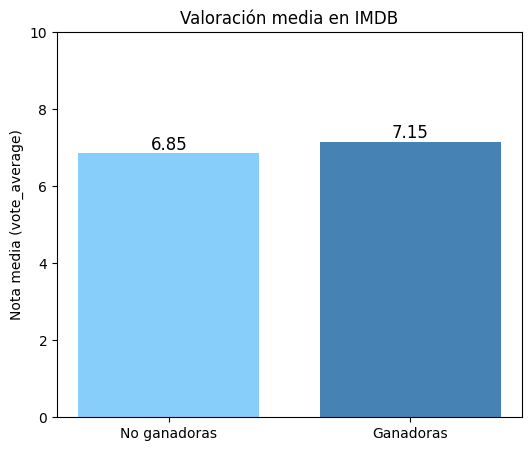

In [26]:
import matplotlib.pyplot as plt

# Calculamos las medias
media_ganadoras = ganadoras['vote_average'].mean()
media_no_ganadoras = no_ganadoras['vote_average'].mean()

# Orden de menor a mayor
if media_ganadoras < media_no_ganadoras:
    etiquetas = ['Ganadoras', 'No ganadoras']
    medias = [media_ganadoras, media_no_ganadoras]
    colores = ['lightskyblue', 'steelblue']
else:
    etiquetas = ['No ganadoras', 'Ganadoras']
    medias = [media_no_ganadoras, media_ganadoras]
    colores = ['lightskyblue', 'steelblue']

# Posiciones más cercanas sin cambiar el tamaño del gráfico
posiciones = [0, 0.4]

# Crear el gráfico
plt.figure(figsize=(6, 5))  # Tamaño original
plt.bar(posiciones, medias, color=colores, width=0.3)

# Etiquetas del eje x
plt.xticks(posiciones, etiquetas)

# Título y eje y
plt.title('Valoración media en IMDB')
plt.ylabel('Nota media (vote_average)')
plt.ylim(0, 10)

# Mostrar los valores numéricos encima
for i, valor in enumerate(medias):
    plt.text(posiciones[i], valor + 0.1, f'{valor:.2f}', ha='center', fontsize=12)

plt.show()


Crear un boxplot comparando ganadoras vs no ganadoras
🎯 Objetivo:
Visualizar cómo se distribuyen las valoraciones del público (vote_average) en ambos grupos (winner == True / False), viendo:

Mediana

Rango de notas

Posibles valores atípicos

C:\Users\eth-0\AppData\Local\Temp\ipykernel_6132\1805828172.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([valores_ganadoras, valores_no_ganadoras], labels=['Ganadoras', 'No ganadoras'])


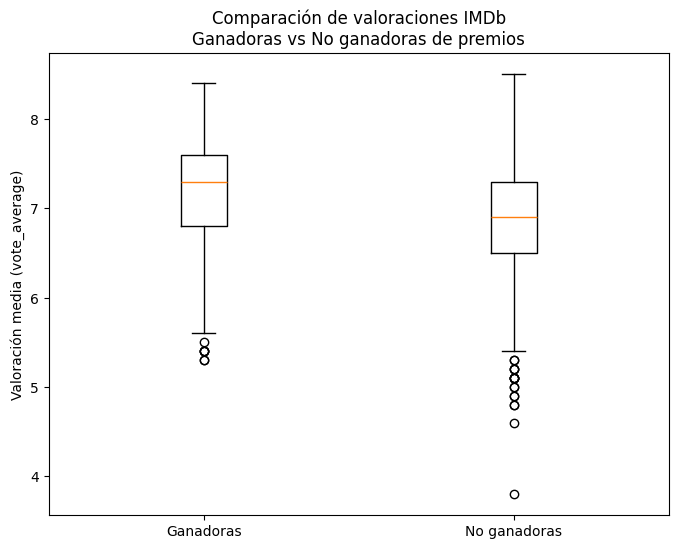

In [27]:
# Creamos listas de valores para cada grupo
valores_ganadoras = osc_tmdb_red_unidos_limpio_df[osc_tmdb_red_unidos_limpio_df['winner'] == True]['vote_average']
valores_no_ganadoras = osc_tmdb_red_unidos_limpio_df[osc_tmdb_red_unidos_limpio_df['winner'] == False]['vote_average']

# Creamos el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([valores_ganadoras, valores_no_ganadoras], labels=['Ganadoras', 'No ganadoras'])

# Añadimos etiquetas y título
plt.title('Comparación de valoraciones IMDb\nGanadoras vs No ganadoras de premios')
plt.ylabel('Valoración media (vote_average)')
# plt.grid(True)

# Mostramos el gráfico
plt.show()


### 📊 Análisis del boxplot

📈 La mediana (línea naranja) de las ganadoras está claramente más arriba que la de las no ganadoras.

🔼 El rango intercuartílico (caja blanca) de las ganadoras está desplazado hacia arriba (entre 6.8 y 7.6), lo que indica mejor valoración general.

⚠️ Ambas distribuciones tienen valores atípicos (círculos), pero son normales y están repartidos.

❗ La caja de las no ganadoras es más baja y con más dispersiones hacia notas bajas.

### ✅ Conclusión visual

El gráfico refuerza lo que vimos con los números:

Las películas ganadoras de premios importantes tienen, en general, valoraciones más altas del público en IMDb que las no ganadoras.

La diferencia es visible, clara y consistente tanto en estadísticos como en visualización.




## 🧪 **t-test**

Es una **prueba estadística** que responde a esta pregunta:

> 📣 “¿La diferencia entre las medias de estos dos grupos es **realmente significativa**, o es solo casualidad?”

En este caso:

* Grupo 1: películas ganadoras
* Grupo 2: películas no ganadoras
* Lo que comparamos: su **nota media (`vote_average`)**



### 🟢 ¿Para qué sirve?

Aunque ya vimos que **la media de las ganadoras es más alta**, eso podría deberse a:

1. ✔️ Una diferencia real que se repite en la población entera (lo que queremos demostrar)
2. ❌ O simple **azar**, por cómo cayeron los datos en nuestra muestra

El **t-test** nos da una **respuesta matemática** a esa duda, solo hay que interpretar un número: el **p-valor**.


### 🧪 ¿Qué es el T-statistic?
El T-statistic (estadístico t) mide la fuerza de la diferencia entre dos grupos, en función de su tamaño, media y variabilidad.
Es decir, cuánto se separan las medias teniendo en cuenta:

cuántos datos hay en cada grupo

lo dispersos que están (desviación estándar)

y la diferencia real entre las medias

#### 📏 ¿Qué valores puede tomar?
🔸 En teoría: puede ir de –∞ a +∞ (es un número real).

🔹 En la práctica: valores entre 0 y 10 ya suelen ser muy altos.

### 📌 ¿Qué indica el **p-valor**?

* Si el `p-valor < 0.05` → ✅ **Sí, la diferencia es estadísticamente significativa**
* Si el `p-valor ≥ 0.05` → ❌ **Podría ser azar, no lo podemos asegurar con confianza**


In [ ]:
from scipy.stats import ttest_ind

# ganadoras = osc_tmdb_red_unidos_limpio_df[osc_tmdb_red_unidos_limpio_df['winner'] == True]
# no_ganadoras = osc_tmdb_red_unidos_limpio_df[osc_tmdb_red_unidos_limpio_df['winner'] == False]

# Listas de notas para cada grupo
notas_ganadoras = ganadoras['vote_average']
notas_no_ganadoras = no_ganadoras['vote_average']

# Test t de diferencia de medias
resultado_ttest = ttest_ind(notas_ganadoras, notas_no_ganadoras)

# Mostramos el resultado
print(f"T-statistic: {resultado_ttest.statistic}")
print(f"P-valor: {resultado_ttest.pvalue}")


T-statistic: 5.210982849955329
P-valor: 2.311148726851669e-07



## 🧪 Resultado del t-test:

| Resultado   | Valor                      | ¿Qué significa?                                                  |
| ----------- | -------------------------- | ---------------------------------------------------------------- |
| T-statistic | `5.21`                     | Tamaño de la diferencia (cuanto mayor, más fuerte la diferencia) |
| **P-valor** | `0.0000002311` (o 2.3e-07) | 🔥 **Muy por debajo de 0.05**                                    |



### ✅ ¿Qué significa este **p-valor**?

> 🔍 **El p-valor mide la probabilidad de que la diferencia observada entre medias sea casual.**

* Si el **p-valor < 0.05** → La diferencia es **estadísticamente significativa**.
* Cuanto **más pequeño sea el p-valor**, más seguridad tenemos de que **la diferencia es real**.



### 🎯 En este caso:

* El p-valor es `0.0000002`, o sea, **prácticamente cero**.
* Esto significa que la probabilidad de que la diferencia en notas sea solo por azar es del **0.00002%**.



### 🟢 CONCLUSIÓN FINAL DE LA HIPÓTESIS:

> ✅ **Sí, las películas que han ganado un premio importante (como un Óscar) tienen, de forma estadísticamente significativa, valoraciones más altas del público en IMDb que las que no ganaron.**

El análisis es sólido, está demostrado con:

* Estadísticas descriptivas
* Visualización (boxplot)
* Prueba estadística (t-test)

